In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
from math import factorial
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
herramienta = pd.read_csv('ai4i2020.csv')

In [3]:
herramienta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [4]:
herramienta.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [5]:
print(herramienta.isnull().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [6]:
herramienta.drop_duplicates(inplace=True)
print(herramienta.duplicated().sum())

0


In [7]:
print(herramienta.shape)
herramienta.head()

(10000, 14)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [8]:
herramienta.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Convertiremos los nombres de las columnas a minusculas para su posterior analisis.

In [14]:
herramienta.columns = [col.lower() for col in herramienta.columns]
print(herramienta.columns)

Index(['udi', 'product id', 'type', 'air temperature [k]',
       'process temperature [k]', 'rotational speed [rpm]', 'torque [nm]',
       'tool wear [min]', 'machine failure', 'twf', 'hdf', 'pwf', 'osf',
       'rnf'],
      dtype='object')


a la columna "Type" que nos habla de carga para utilizar sus datos vamos a convertirlos en valor númerico

In [15]:
herramienta['type'] = herramienta['type'].map({'L': 0, 'M': 1, 'H': 2})

Ganeraremos un mapa de calor para ver la correlacion que existen entre las columnas de nuestra base de datos, eliminaremos algunas ya que sus datos no aportaran al estudio.

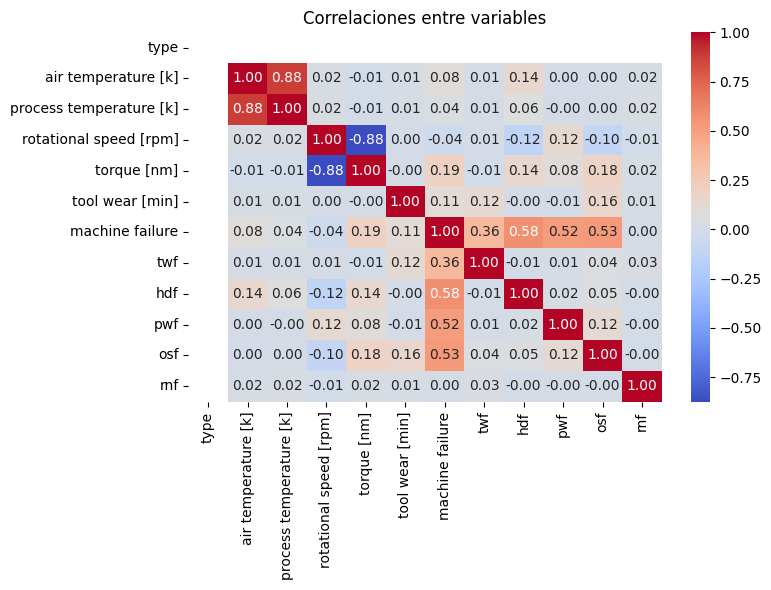

In [16]:
df = herramienta.drop(columns=['udi', 'product id'])

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlaciones entre variables')
plt.tight_layout()
plt.show()

Trabajeremos para encontrar las columnas con correlación más fuerte con "machine failure" ya que esta columna sera nuestro objetivo para preddecir o anticipar fallas.

In [17]:
correlaciones_falla = df.corr()['machine failure'].sort_values(ascending=False)
print(correlaciones_falla)

machine failure            1.000000
hdf                        0.575800
osf                        0.531083
pwf                        0.522812
twf                        0.362904
torque [nm]                0.191321
tool wear [min]            0.105448
air temperature [k]        0.082556
process temperature [k]    0.035946
rnf                        0.004516
rotational speed [rpm]    -0.044188
type                            NaN
Name: machine failure, dtype: float64


Vamos a obtener de la columna 'machine failure' cuántas veces se registró falla y cuántas no.

In [19]:
conteo_fallas = df['machine failure'].value_counts()
print(conteo_fallas)

machine failure
0    9661
1     339
Name: count, dtype: int64


Vamos a trabajar con las columnas "torque [nm]" y "tool wear [min] porque cuando la columna "machine failure" marca '1' es decir falla los valores de estas columnas cambian (se comportan de manera distinta) sin estar directamente relacionadas con la misma

Generaremos un gráfico boxplot para observar si la columna "torque" muestra diferencias claras entre equipos que fallan y los que no.

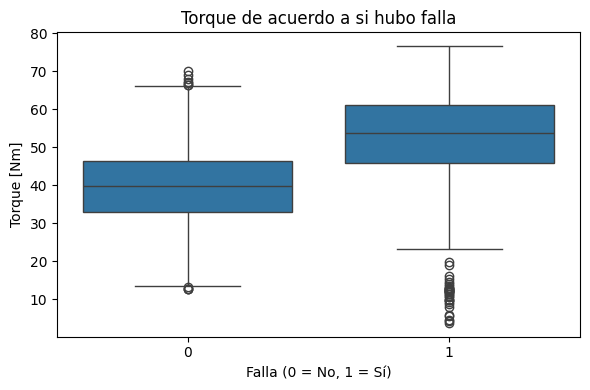

In [24]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='machine failure', y='torque [nm]', data=df)
plt.title('Torque de acuerdo a si hubo falla')
plt.xlabel('Falla (0 = No, 1 = Sí)')
plt.ylabel('Torque [Nm]')
plt.tight_layout()
plt.show()

Este gráfico nos muestra que cuando existe falla en la maquina los valores de la columna "torque" tienden a ser altos

Generaremos un gráfico boxplot para observar si la columna "tool wear" muestra diferencias claras entre equipos que fallan y los que no.

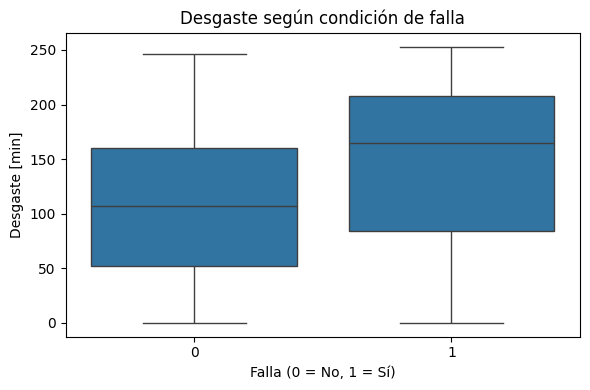

In [23]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='machine failure', y='tool wear [min]', data=df)
plt.title('Desgaste según condición de falla')
plt.xlabel('Falla (0 = No, 1 = Sí)')
plt.ylabel('Desgaste [min]')
plt.tight_layout()
plt.show()


El gráfico muestra que el desgaste tiende a ser mayor en los casos donde hay falla, lo que lo convierte en un dato útil para anticipar o priorizar revisiones.

Combinaremos las columnas "torque" y  "tool wear"   para afinar el diagnostico 

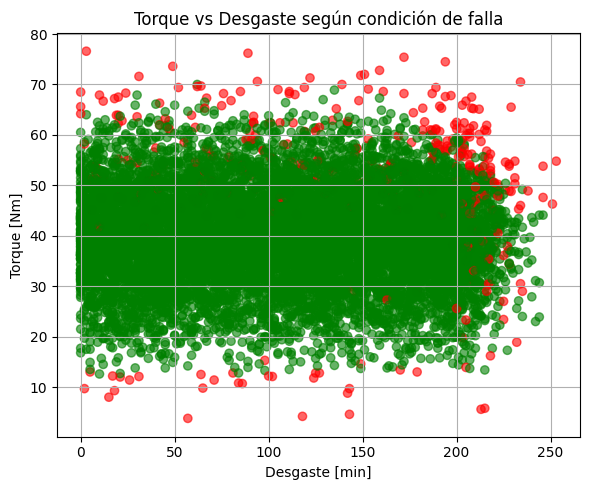

In [27]:
plt.figure(figsize=(6, 5))
colors = df['machine failure'].map({0: 'green', 1: 'red'})

plt.scatter(df['tool wear [min]'], df['torque [nm]'], c=colors, alpha=0.6)
plt.xlabel('Desgaste [min]')
plt.ylabel('Torque [Nm]')
plt.title('Torque vs Desgaste según condición de falla')
plt.grid(True)
plt.tight_layout()
plt.show()


Este gráfico nos  muestra que los casos con falla tienden a tener torque('torque') y desgaste('tool wear') elevados al mismo tiempo, lo que confirma que su combinación puede servir como señal preventiva.

 Crearemos un codigo para obtener las Condiciones técnicas que separan los registros con riesgo real de falla.

In [ ]:
criticidad = df[
    (df['torque [nm]'] > 50) &
    (df['tool wear [min]'] > 200)]

punto_critico = criticidad[criticidad['machine failure'] == 1]

print("Total de registros críticos:", len(criticidad))
print("Registros con falla dentro del filtro:", len(punto_critico))


Total de registros críticos: 107
Registros con falla dentro del filtro: 62


Vamos a Preprar el Modelo predictivo usaremos "El Arbol de Desición" (Decision Tree)

In [34]:
tool_modelo = df[['torque [nm]', 'tool wear [min]', 'machine failure']]

X = tool_modelo[['torque [nm]', 'tool wear [min]']]
y = tool_modelo['machine failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
modelo = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2907
           1       0.83      0.22      0.34        93

    accuracy                           0.97      3000
   macro avg       0.90      0.61      0.66      3000
weighted avg       0.97      0.97      0.97      3000



El modelo actual detecta bien los casos sin falla, pero no identifica la mayoría de las fallas reales.
Esto se debe a que hay muchos más registros sin falla en el historial, y el modelo se enfoca en ellos.
Para mejorar la detección de fallas, se a realizará un ajuste al modelo para dar más peso a los casos críticos, aunque sean menos frecuentes.


In [ ]:
tool_modelo = df[['torque [nm]', 'tool wear [min]', 'machine failure']]


X = tool_modelo[['torque [nm]', 'tool wear [min]']]
y = tool_modelo['machine failure']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
modelo = DecisionTreeClassifier(max_depth=3, class_weight='balanced', random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.74      0.85      2907
           1       0.10      0.91      0.18        93

    accuracy                           0.75      3000
   macro avg       0.55      0.83      0.52      3000
weighted avg       0.97      0.75      0.83      3000



El ajuste en el modelo mejoró la detección de fallas reales, pero genera muchas falsas alertas, lo que puede implicar revisiones innecesarias y gasto operativo.
Por lo tanto, se cambia el modelo predictivo a "Random Forest", que permite mayor estabilidad, mejor control de errores y ajuste fino en la detección de fallas.


In [37]:
tool_modelo = df[['torque [nm]', 'tool wear [min]', 'machine failure']]

X = tool_modelo[['torque [nm]', 'tool wear [min]']]
y = tool_modelo['machine failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo_rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
modelo_rf.fit(X_train, y_train)

y_pred = modelo_rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2907
           1       0.76      0.41      0.53        93

    accuracy                           0.98      3000
   macro avg       0.87      0.70      0.76      3000
weighted avg       0.97      0.98      0.97      3000



Se aplicará un filtro para mostrar únicamente los equipos con alto riesgo de falla, que tengan el 70% de probabilidad según el modelo.
Esto permite priorizar revisiones útiles y evitar gasto innecesario en equipos sin riesgo.
Se Creará una Tabla.

In [ ]:
probabilidades = modelo_rf.predict_proba(X_test)
riesgo = X_test.copy()
riesgo['prob_falla'] = probabilidades[:, 1]
alto_riesgo = riesgo[riesgo['prob_falla'] > 0.70]

print(alto_riesgo)

      torque [nm]  tool wear [min]  prob_falla
4071         68.6               85        0.78
8846         62.4              204        0.77
259          63.9               19        0.72
9414         53.9              207        0.89
4900         41.9              221        0.72
3019         54.2              207        0.88
4898         53.7              214        0.73
8278         46.4              207        0.72
50            4.6              143        0.94
248          56.8              216        0.93
1496         69.4              189        0.93
3684         65.3              182        0.73
4048         12.1               31        0.79
1595         52.9              218        0.97
8582         72.0              151        0.86
5399         53.8              246        0.90
3528         53.1              212        0.83
1162         57.1              202        0.79
4342         68.2              111        0.81
6248         61.2              189        0.78
9084         

Este filtro permite priorizar equipos críticos y enfocar recursos en los que realmente podrían fallar.
Con esto se evita revisar equipos con baja probabilidad, reduciendo gasto innecesario.
Esta tabla resultante es accionable: puede usarse directamente en planta para programar revisiones.

Realizaremos un filtrado adicional a la Tabla, este se enfocará en los equipos con riesgo muy alto.

In [ ]:
riesgo['accion'] = riesgo['prob_falla'].apply(lambda x: 'Revisar' if x > 0.85 else '')

revisiones = riesgo[riesgo['accion'] == 'Revisar']
print(revisiones)

      torque [nm]  tool wear [min]  prob_falla   accion
9414         53.9              207        0.89  Revisar
3019         54.2              207        0.88  Revisar
50            4.6              143        0.94  Revisar
248          56.8              216        0.93  Revisar
1496         69.4              189        0.93  Revisar
1595         52.9              218        0.97  Revisar
8582         72.0              151        0.86  Revisar
5399         53.8              246        0.90  Revisar
1095          9.3               18        0.95  Revisar
8192         65.2              209        0.98  Revisar
4024         60.3              207        0.99  Revisar
8398         12.1              102        0.91  Revisar
69           65.7              191        0.96  Revisar


Este código permite generar una lista directa de equipos críticos, con riesgo superior al 85%.
Esto es ideal para realizar acciones urgentes en planta, sin revisar toda la tabla.
Esta tabla puede usarse como base para alertas, órdenes de trabajo o revisión técnica prioritaria.
